Problem 2

The dataset contains 6 years of information (weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Market+Risk+Dataset.csv to Market+Risk+Dataset.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("Market+Risk+Dataset.csv")

In [ ]:
df.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [ ]:
df.shape

(314, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian Hotel         314 non-null    int64 
 3   Mahindra & Mahindra  314 non-null    int64 
 4   Axis Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree Cement         314 non-null    int64 
 7   Sun Pharma           314 non-null    int64 
 8   Jindal Steel         314 non-null    int64 
 9   Idea Vodafone        314 non-null    int64 
 10  Jet Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [ ]:
print("The no. of rows: ",df.shape[0], "\n""The no. of columns: ",df.shape[1])

The no. of rows:  314 
The no. of columns:  11


In [ ]:
df.dtypes

Date                   object
Infosys                 int64
Indian Hotel            int64
Mahindra & Mahindra     int64
Axis Bank               int64
SAIL                    int64
Shree Cement            int64
Sun Pharma              int64
Jindal Steel            int64
Idea Vodafone           int64
Jet Airways             int64
dtype: object

In [ ]:
df['Date'] = [pd.to_datetime(d) for d in df['Date']]

In [ ]:
df.dtypes

Date                   datetime64[ns]
Infosys                         int64
Indian Hotel                    int64
Mahindra & Mahindra             int64
Axis Bank                       int64
SAIL                            int64
Shree Cement                    int64
Sun Pharma                      int64
Jindal Steel                    int64
Idea Vodafone                   int64
Jet Airways                     int64
dtype: object

In [ ]:
df.isnull().sum()

Date                   0
Infosys                0
Indian Hotel           0
Mahindra & Mahindra    0
Axis Bank              0
SAIL                   0
Shree Cement           0
Sun Pharma             0
Jindal Steel           0
Idea Vodafone          0
Jet Airways            0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Infosys,314.0,511.340764,135.952051,234.0,424.00,466.5,630.75,810.0
Indian Hotel,314.0,114.560510,22.509732,64.0,96.00,115.0,134.00,157.0
Mahindra & Mahindra,314.0,636.678344,102.879975,284.0,572.00,625.0,678.00,956.0
Axis Bank,314.0,540.742038,115.835569,263.0,470.50,528.0,605.25,808.0
SAIL,314.0,59.095541,15.810493,21.0,47.00,57.0,71.75,104.0
Shree Cement,314.0,14806.410828,4288.275085,5543.0,10952.25,16018.5,17773.25,24806.0
Sun Pharma,314.0,633.468153,171.855893,338.0,478.50,614.0,785.00,1089.0
Jindal Steel,314.0,147.627389,65.879195,53.0,88.25,142.5,182.75,338.0
Idea Vodafone,314.0,53.713376,31.248985,3.0,25.25,53.0,82.00,117.0
Jet Airways,314.0,372.659236,202.262668,14.0,243.25,376.0,534.00,871.0


In [ ]:
print("The no. of duplicated rows is: ",df.duplicated().sum())

The no. of duplicated rows is:  0


2.1 Draw Stock Price Graph (Stock Price vs Time) for any 2 given stocks with inference

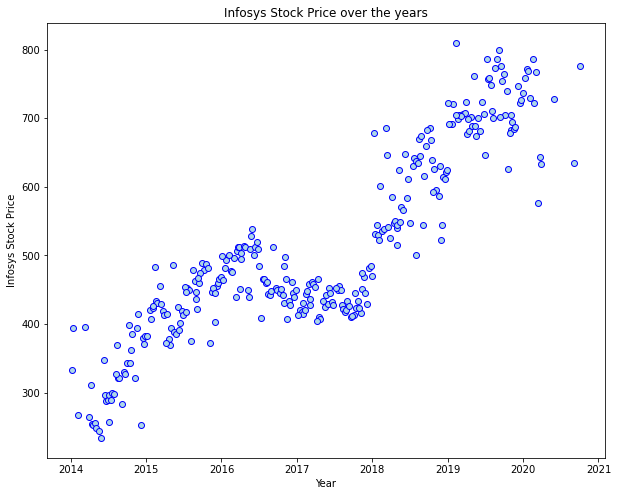

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(df['Date'], df['Infosys'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Infosys Stock Price')
plt.title('Infosys Stock Price over the years')
plt.show()

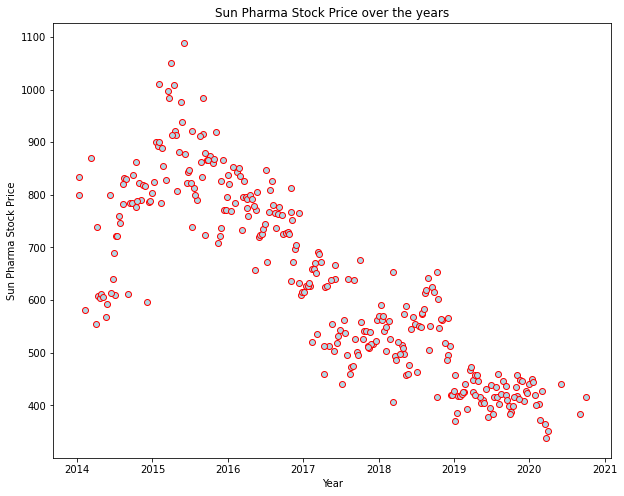

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(df['Date'], df['Sun Pharma'], edgecolors='r', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Sun Pharma Stock Price')
plt.title('Sun Pharma Stock Price over the years')
plt.show()

2.2 Calculate Returns for all stocks with inference

In [ ]:
stock_returns = np.log(df.drop(['Date'],axis=1)).diff(axis = 0, periods = 1) 

In [ ]:
stock_returns.shape

(314, 10)

In [ ]:
stock_returns.head()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


2.3 Calculate Stock Means and Standard Deviation for all stocks with inference

Calculating stock means

In [ ]:
stock_means = stock_returns.mean(axis = 0)
stock_means.sort_values(ascending=False)

Shree Cement           0.003681
Infosys                0.002794
Axis Bank              0.001167
Indian Hotel           0.000266
Sun Pharma            -0.001455
Mahindra & Mahindra   -0.001506
SAIL                  -0.003463
Jindal Steel          -0.004123
Jet Airways           -0.009548
Idea Vodafone         -0.010608
dtype: float64

Calculating standard deviation

In [ ]:
stock_sd = stock_returns.std(axis = 0)
stock_sd.sort_values(ascending=False)

Idea Vodafone          0.104315
Jet Airways            0.097972
Jindal Steel           0.075108
SAIL                   0.062188
Indian Hotel           0.047131
Axis Bank              0.045828
Sun Pharma             0.045033
Mahindra & Mahindra    0.040169
Shree Cement           0.039917
Infosys                0.035070
dtype: float64

2.4 Draw a plot of Stock Means vs Standard Deviation and state your inference

In [ ]:
df1 = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df1

,Average,Volatility
Infosys,0.002794,0.035070
Indian Hotel,0.000266,0.047131
Mahindra & Mahindra,-0.001506,0.040169
Axis Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree Cement,0.003681,0.039917
Sun Pharma,-0.001455,0.045033
Jindal Steel,-0.004123,0.075108
Idea Vodafone,-0.010608,0.104315
Jet Airways,-0.009548,0.097972


In [ ]:
file_name = 'Stock.xlsx'

In [ ]:
df1.to_excel(file_name)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Stock.xlsx to Stock (1).xlsx


In [ ]:
df1 = pd.read_excel("Stock.xlsx")

In [ ]:
df1

,Unnamed: 0,Average,Volatility
0,Infosys,0.002794,0.035070
1,Indian Hotel,0.000266,0.047131
2,Mahindra & Mahindra,-0.001506,0.040169
3,Axis Bank,0.001167,0.045828
4,SAIL,-0.003463,0.062188
5,Shree Cement,0.003681,0.039917
6,Sun Pharma,-0.001455,0.045033
7,Jindal Steel,-0.004123,0.075108
8,Idea Vodafone,-0.010608,0.104315
9,Jet Airways,-0.009548,0.097972


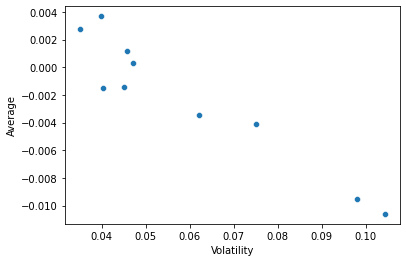

In [ ]:
plot = sns.scatterplot(df1['Volatility'], df1['Average'])

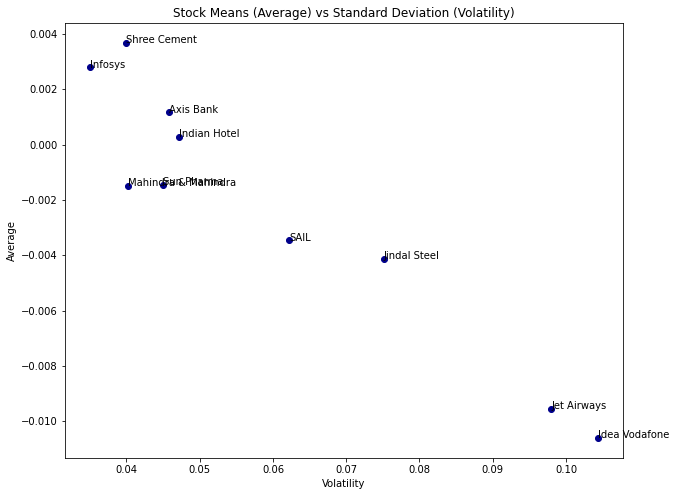

In [ ]:
# open figure + axis
fig, ax = plt.subplots(1,1,figsize=(10,8))
# plot
ax.scatter(x=df1['Volatility'],y=df1['Average'],c='DarkBlue')
# set labels
ax.set_xlabel('Volatility')
ax.set_ylabel('Average')
ax.set_title('Stock Means (Average) vs Standard Deviation (Volatility)')

# annotate points in axis
for idx, row in df1.iterrows():
    ax.annotate(row['Unnamed: 0'], (row['Volatility'], row['Average']))
# force matplotlib to draw the graph
plt.show()

2.5 Conclusion and Recommendations

In [ ]:
Problem 2

The dataset contains 6 years of information (weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights.

from google.colab import files
uploaded = files.upload()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("Market+Risk+Dataset.csv")

df.head()

df.shape

df.info()

print("The no. of rows: ",df.shape[0], "\n""The no. of columns: ",df.shape[1])

df.dtypes

df['Date'] = [pd.to_datetime(d) for d in df['Date']]

df.dtypes

df.isnull().sum()

df.describe().T

print("The no. of duplicated rows is: ",df.duplicated().sum())

2.1 Draw Stock Price Graph (Stock Price vs Time) for any 2 given stocks with inference

plt.figure(figsize = (10, 8))
plt.scatter(df['Date'], df['Infosys'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Infosys Stock Price')
plt.title('Infosys Stock Price over the years')
plt.show()

plt.figure(figsize = (10, 8))
plt.scatter(df['Date'], df['Sun Pharma'], edgecolors='r', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Sun Pharma Stock Price')
plt.title('Sun Pharma Stock Price over the years')
plt.show()

2.2 Calculate Returns for all stocks with inference

stock_returns = np.log(df.drop(['Date'],axis=1)).diff(axis = 0, periods = 1) 

stock_returns.shape

stock_returns.head()

2.3 Calculate Stock Means and Standard Deviation for all stocks with inference

Calculating stock means

stock_means = stock_returns.mean(axis = 0)
stock_means.sort_values(ascending=False)

Calculating standard deviation

stock_sd = stock_returns.std(axis = 0)
stock_sd.sort_values(ascending=False)

2.4 Draw a plot of Stock Means vs Standard Deviation and state your inference

df1 = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df1

file_name = 'Stock.xlsx'

df1.to_excel(file_name)

from google.colab import files
uploaded = files.upload()

df1 = pd.read_excel("Stock.xlsx")

df1

plot = sns.scatterplot(df1['Volatility'], df1['Average'])

# open figure + axis
fig, ax = plt.subplots(1,1,figsize=(10,8))
# plot
ax.scatter(x=df1['Volatility'],y=df1['Average'],c='DarkBlue')
# set labels
ax.set_xlabel('Volatility')
ax.set_ylabel('Average')
ax.set_title('Stock Means (Average) vs Standard Deviation (Volatility)')

# annotate points in axis
for idx, row in df1.iterrows():
    ax.annotate(row['Unnamed: 0'], (row['Volatility'], row['Average']))
# force matplotlib to draw the graph
plt.show()

2.5 Conclusion and Recommendations